In [1]:
import pandas as pd
from utils import make_plot, rmse

In [2]:
log_file_path = 'log1.log' #'vertcirc_1_OG.log' #helix_spin_0.log #helix_spin_1_OG.log #helix_spin_jax.log #vertcirc_1_NEW.log
# Reading the .log file into a pandas DataFrame
df_log = pd.read_csv(log_file_path, header=0, dtype={'metadata': str})

# Display the first few rows to confirm successful import
df_log.head()

,time,x,y,z,yaw,throttle,roll_rate,pitch_rate,yaw_rate,x_ref,y_ref,z_ref,yaw_ref,mpc_time,metadata
0,7.152557e-07,0.008321,-0.015151,-0.004890,-0.003527,-0.921698,0.149600,0.051806,0.022523,0.0,0.0,-0.6,0.0,0.001528,Sim
1,9.994030e-03,0.008510,-0.015010,-0.004959,-0.003523,-0.921660,0.149915,0.052587,0.022497,0.0,0.0,-0.6,0.0,0.000603,Horizon:3.0
2,2.016139e-02,0.008510,-0.015010,-0.004959,-0.003523,-0.921660,0.149915,0.052587,0.022497,0.0,0.0,-0.6,0.0,0.000226,Num Steps:20
3,2.988839e-02,0.008632,-0.014932,-0.004990,-0.003541,-0.921684,0.148200,0.052344,0.022616,0.0,0.0,-0.6,0.0,0.000834,No Pyjoules
4,4.023027e-02,0.008632,-0.014932,-0.004990,-0.003541,-0.921684,0.148200,0.052344,0.022616,0.0,0.0,-0.6,0.0,0.000251,0


In [3]:
actual_values = df_log[['x', 'y', 'z', 'yaw']].to_numpy()
reference_values = df_log[['x_ref', 'y_ref', 'z_ref', 'yaw_ref']].to_numpy()

In [4]:
# actual_values[:,3] = actual_values[:,3] * .18
# reference_values[:,3] = reference_values[:,3] * .18

In [5]:
print(f"This data comes from: {df_log['metadata'][0]}")
print(f"{df_log['metadata'][1]}")
print(f"{df_log['metadata'][2]}")
print(f"{df_log['metadata'][3]}")
print(f"RMSE: {rmse(df_log)}")


This data comes from: Sim
Horizon:3.0
Num Steps:20
No Pyjoules
RMSE: 0.5211137060693869


# Plot it!

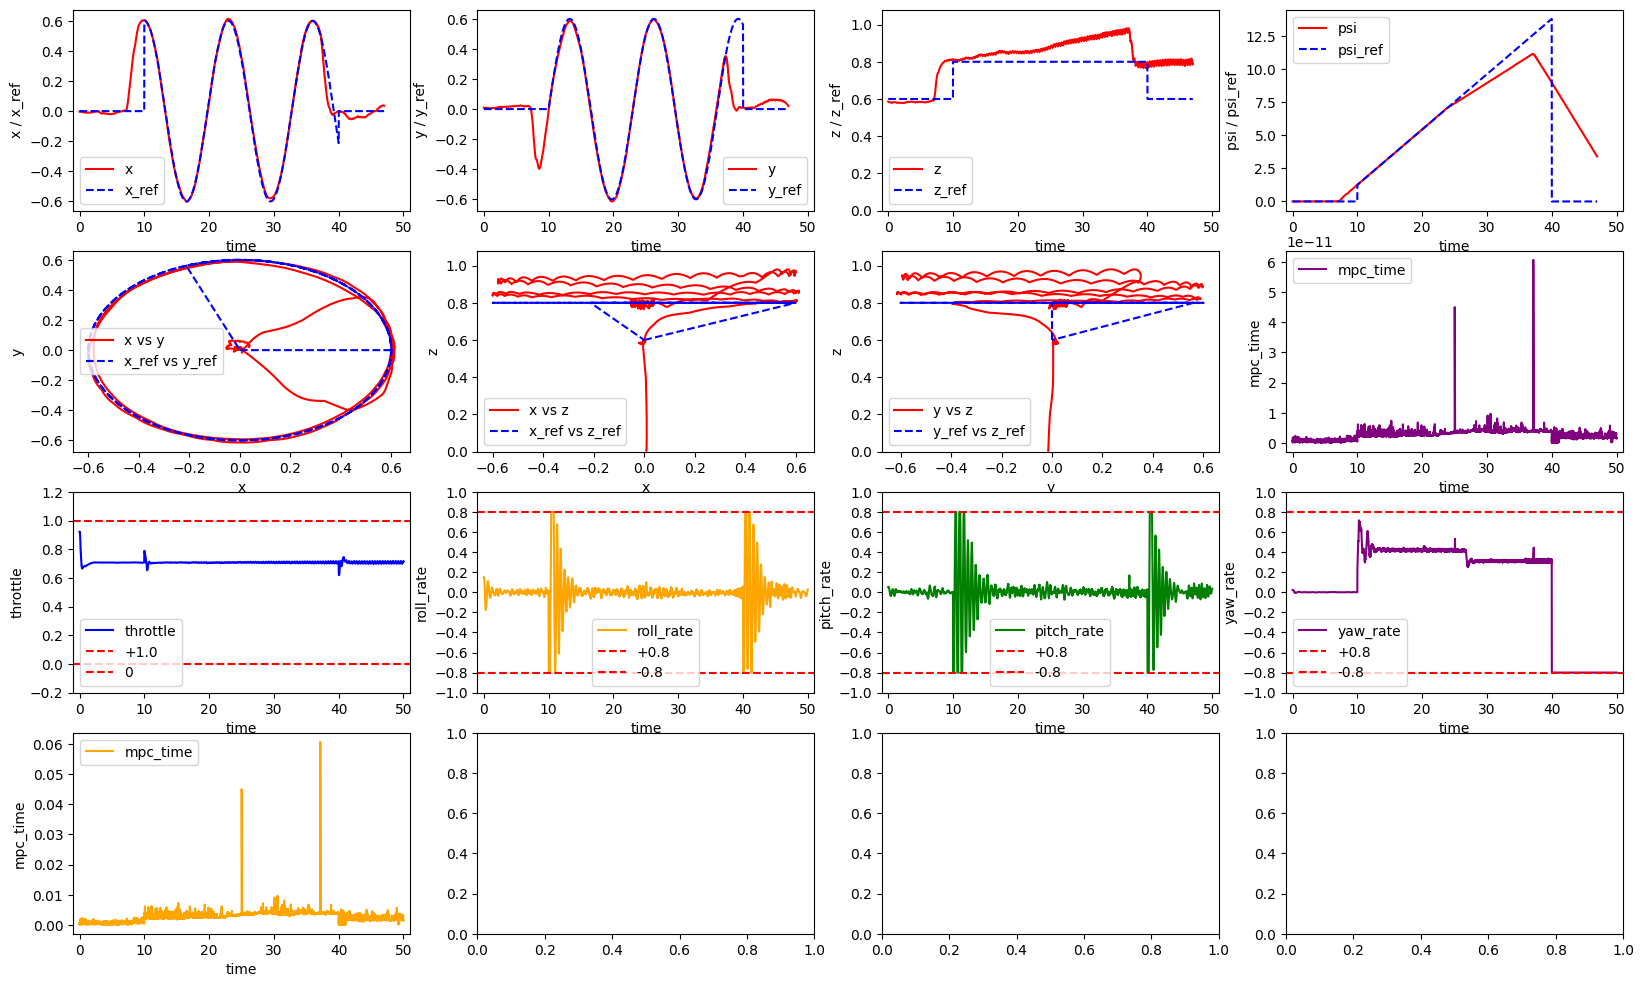

In [6]:
# Reuse the plotting function defined earlier for the uploaded .log data
make_plot(df_log)

In [7]:
import numpy as np
import math as m
horizon = 3
num_steps = 20
t = 0
t = np.linspace(t, t + horizon, num_steps)


In [8]:
t = 0
t = np.linspace(t, horizon, num_steps)

PERIOD = 13 # used to have w=.5 which is rougly PERIOD = 4*pi ~= 12.56637
w = 2*np.pi / PERIOD

SPIN_PERIOD = 15
yaw_ref = t / (SPIN_PERIOD / (2*m.pi))
x = .6*np.cos(w*t)
y = .6*np.sin(w*t)
z = -0.8*np.ones(num_steps)
vx = 0.0 * np.ones(num_steps)
vy = 0.0 * np.ones(num_steps)
vz = 0.0 * np.ones(num_steps)
roll = 0.0 * np.ones(num_steps)
pitch = 0.0 * np.ones(num_steps)
yaw = yaw_ref * np.ones(num_steps)

r = np.array([x, y, z, vx, vy, vz, roll, pitch, yaw]).T


In [9]:
r[0]

array([ 0.6,  0. , -0.8,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ])

In [10]:
num_steps = 20
x,y,z,vx,vy,vz,roll,pitch,yaw = np.random.randn(9)

In [11]:
r = np.array([[x, y, z, vx, vy, vz, roll, pitch, yaw]]).T
r_final = np.tile(r, (1, num_steps))

In [12]:
r_final.shape

(9, 20)

In [13]:
t = 5
horizon = 3
num_steps = 20
t = np.linspace(t, t+horizon, num_steps)

PERIOD = 13 # used to have w=.5 which is rougly PERIOD = 4*pi ~= 12.56637
w = 2*np.pi / PERIOD

SPIN_PERIOD = 15
yaw_ref = t / (SPIN_PERIOD / (2*m.pi))
x = .6*np.cos(w*t).reshape(1,20)

In [14]:
print(f"{x.shape = }")

x.shape = (1, 20)


In [15]:
x = x.reshape(-1)
print(f"{x.shape = }")

x.shape = (20,)


In [16]:
x = x.flatten()

In [17]:
print(f"{x.shape = }")

x.shape = (20,)
